# Classification Modeling, Visualization, and Comparative Analysis Using Machine Learning

### Project Overview
This project presents a complete end-to-end machine learning classification pipeline using a real-world dataset. The objective is to apply core data science concepts including data preprocessing, feature engineering, exploratory data analysis (EDA), classification modeling, and comparative performance analysis.

Five different classification algorithms are implemented and evaluated both before and after applying feature engineering techniques, including Principal Component Analysis (PCA). The performance of the models is compared using standard evaluation metrics to identify the most effective approach for the given dataset.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


Mounted at /content/drive


## Dataset Description

For this project, I selected a dataset having more than 1,000 records and containing both numerical and categorical features.

- **Dataset Name:** Adult Income Dataset
- **Number of Records:** 32,561 rows
- **Number of Features:** 14 input features + 1 target variable
- **Target Variable:** Income (<=50K or >50K)

The dataset contains demographic and employment-related information such as age, education level, occupation, working hours, and marital status. The objective is to predict whether an individual's income exceeds $50K per year based on these attributes.

This dataset is widely used for classification tasks and provides meaningful patterns for applying data preprocessing, visualization, and machine learning techniques.

**Dataset Source:**  
UCI Machine Learning Repository – Adult Income Dataset


### Dataset Characteristics

- **Numerical Features:**  
  Age, Education Number, Capital Gain, Capital Loss, Hours per Week

- **Categorical Features:**  
  Workclass, Education, Marital Status, Occupation, Relationship, Race, Sex, Native Country

The presence of both numerical and categorical attributes makes this dataset suitable for demonstrating data preprocessing techniques such as encoding, scaling, and handling missing values.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/adult_income.csv")

df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Dataset Shape

To understand the size of the dataset, I check the number of rows and columns.


In [ ]:
# Check number of rows and columns
df.shape


(32561, 15)

## Data Types of Features

Understanding the data types of each feature is important because it determines how the data will be processed. Numerical and categorical features are handled differently during preprocessing and modeling.


In [ ]:
# Display data types of each column
df.dtypes


,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


## Data Preprocessing

Data preprocessing is a critical step in the data science pipeline, as real-world datasets are often incomplete, inconsistent, or unstructured. Before applying any machine learning model, the data must be cleaned and transformed into a suitable format.

In this project, multiple preprocessing techniques taught in the midterm syllabus are applied. These include handling missing values, encoding categorical variables, feature scaling, and splitting the dataset into training, validation, and testing sets.


## Handling Missing Values

Missing values can negatively impact model performance if not handled properly. In the Adult Income dataset, missing values are represented by the symbol "?". These values appear in several categorical features.

In this step, missing values are identified and handled to ensure data consistency and reliability.


In [ ]:
import numpy as np

# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Check missing values in each column
df.isnull().sum()


,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


After identifying the missing values, rows containing missing data are removed. Since the dataset is large, removing a small number of incomplete records does not significantly affect the overall analysis.


In [ ]:
# Remove rows with missing values
df.dropna(inplace=True)

# Verify missing values are removed
df.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


## Encoding Categorical Variables

Machine learning algorithms require numerical input data. Therefore, categorical variables must be converted into numerical form.

In this project:
- One-Hot Encoding is applied to input categorical features.
- Label Encoding is applied to the target variable.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,34,216864,9,0,3770,45,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6,38,150601,6,0,3770,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


## Feature Scaling

Feature scaling ensures that numerical features are on a similar scale, which helps improve the performance of many machine learning algorithms.

In this project, Standardization is applied to numerical features so that they have a mean of 0 and a standard deviation of 1.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Separate features and target
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Scale features
X_scaled = scaler.fit_transform(X)


## Splitting the Dataset

To evaluate the model effectively, the dataset is split into three parts:
- Training set: used to train the model
- Validation set: used for model tuning
- Testing set: used for final evaluation

This approach helps prevent overfitting and provides an unbiased estimate of model performance.


In [ ]:
from sklearn.model_selection import train_test_split

# First split: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42
)

# Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

# Display shapes
X_train.shape, X_val.shape, X_test.shape


((21113, 96), (4524, 96), (4525, 96))

## Feature Engineering

Feature Engineering is the process of creating, transforming, extracting, and selecting features to improve the performance of machine learning models. Well-engineered features allow models to capture underlying patterns more effectively, leading to better accuracy and generalization.

According to Lecture-16, feature engineering is categorized into Feature Creation, Feature Transformation, Feature Extraction, and Feature Selection. In this project, selected techniques from these categories are applied in a structured manner, including domain-based feature creation, feature selection using correlation, and feature extraction using Principal Component Analysis (PCA).


## Feature Creation (Domain-Based)

Feature creation involves generating new and more meaningful features from existing data using domain knowledge. Since income is influenced by factors such as age, education, and working hours, new features are created to better capture these relationships.

In this step, age-based grouping and work intensity features are introduced to provide additional signals to the model.


In [ ]:
df_encoded['age_group'] = pd.cut(
    df_encoded['age'],
    bins=[0, 30, 50, 100],
    labels=['Young', 'Adult', 'Senior']
)

df_encoded['work_intensity'] = (
    df_encoded['hours.per.week'] * df_encoded['education.num']
)


The newly created features help capture real-world patterns that may not be directly visible in the original dataset. Grouping age simplifies interpretation, while work intensity reflects the combined impact of education level and working hours on income.


## Feature Selection using Correlation

Feature selection involves choosing the most relevant features while removing redundant or highly correlated ones. According to Lecture-16, correlation-based filtering is a common statistical method used to detect multicollinearity among features.

Highly correlated features provide similar information to the model and may negatively affect performance. Therefore, one feature from each highly correlated pair is removed.


In [ ]:
import numpy as np

# Compute correlation matrix
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Identify highly correlated features
correlation_threshold = 0.85
high_corr_features = [
    column for column in upper_triangle.columns
    if any(upper_triangle[column] > correlation_threshold)
]

high_corr_features


[]

In [ ]:
# Drop highly correlated features
X_selected = pd.DataFrame(X_scaled, columns=X.columns).drop(
    columns=high_corr_features
)

X_selected.shape


(30162, 96)

By removing highly correlated features, the dataset becomes more compact and informative. This step reduces multicollinearity and improves the efficiency of downstream modeling and feature extraction techniques such as PCA.


## Feature Extraction using Principal Component Analysis (PCA)

Feature extraction aims to reduce high-dimensional data into a smaller set of meaningful features while retaining most of the original information. According to Lecture-16, Principal Component Analysis (PCA) is a widely used technique for this purpose.

PCA transforms correlated features into a new set of uncorrelated components, called principal components, ordered by the amount of variance they explain.


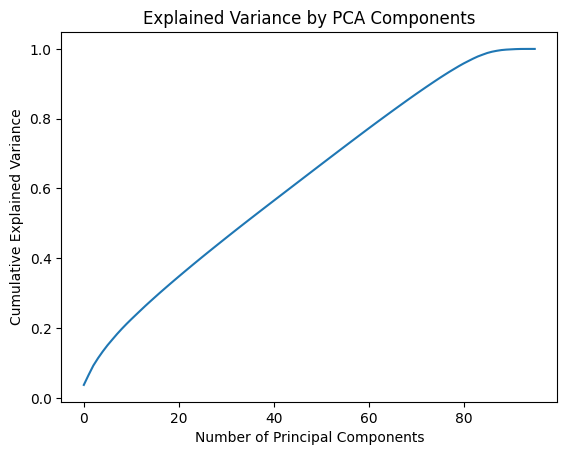

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to selected features
pca = PCA()
X_pca = pca.fit_transform(X_selected)

# Plot explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()


In [ ]:
# Select number of components that explain ~95% variance
pca_final = PCA(n_components=0.95)
X_pca_final = pca_final.fit_transform(X_selected)

X_pca_final.shape


(30162, 80)

The number of principal components was selected based on cumulative explained variance. By retaining components that explain approximately 95% of the variance, dimensionality is reduced while preserving most of the important information in the dataset.


## Exploratory Data Analysis (EDA) and Visualizations

Exploratory Data Analysis (EDA) is used to understand the structure, patterns, and relationships present in the dataset before applying machine learning models. Visualizations help identify trends, outliers, distributions, and feature relationships that guide preprocessing, feature engineering, and model selection decisions.

In this section, multiple visualizations are created to gain insights into both numerical and categorical features and their relationship with the target variable.


### Visualization 1: Distribution of Age

A histogram is used to observe the distribution of the `age` feature. This helps identify skewness, concentration of values, and whether transformations or grouping are required.


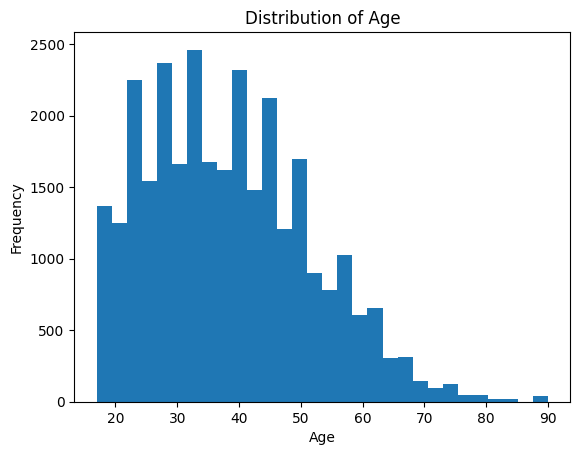

In [ ]:
plt.figure()
plt.hist(df['age'], bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()


This visualization shows that most individuals fall within the adult age range, with fewer observations at extreme ages. This insight guided the feature engineering step where age was grouped into categories (Young, Adult, Senior) to simplify patterns and reduce noise.


### Visualization 2: Boxplot of Hours per Week

Boxplots are used to detect outliers and understand the spread of numerical data. This visualization focuses on working hours per week.


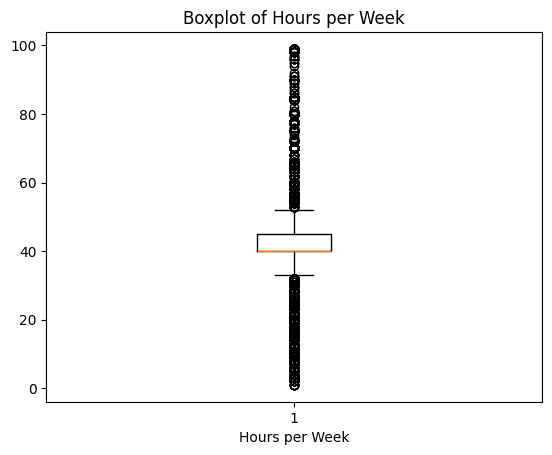

In [ ]:
plt.figure()
plt.boxplot(df['hours.per.week'])
plt.xlabel("Hours per Week")
plt.title("Boxplot of Hours per Week")
plt.show()


The boxplot reveals the presence of extreme working hours, indicating potential outliers. Since these values represent realistic work behavior rather than data errors, they were retained. However, this observation justified applying feature scaling to reduce the influence of extreme values on model performance.


### Visualization 3: Relationship between Age and Hours per Week

A scatter plot is used to analyze the relationship between age and working hours to identify trends or interactions.


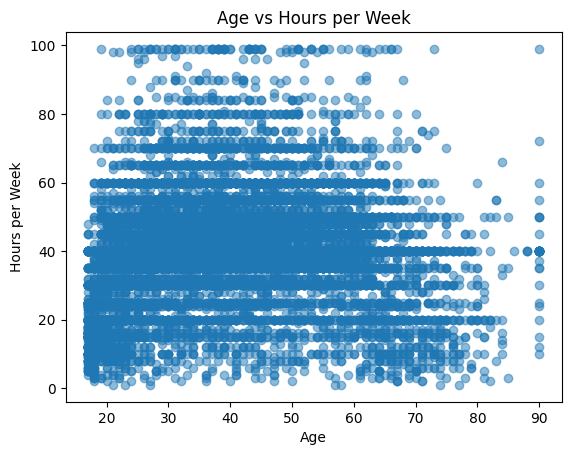

In [ ]:
plt.figure()
plt.scatter(df['age'], df['hours.per.week'], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.title("Age vs Hours per Week")
plt.show()


This scatter plot shows varying work patterns across different age groups, with no strong linear relationship. This observation supported the creation of interaction-based features such as work intensity, which combines working hours with education level to better represent income-related behavior.


### Visualization 4: Income Distribution by Education Level

Bar charts help analyze how categorical features influence the target variable. This chart shows income distribution across different education levels.


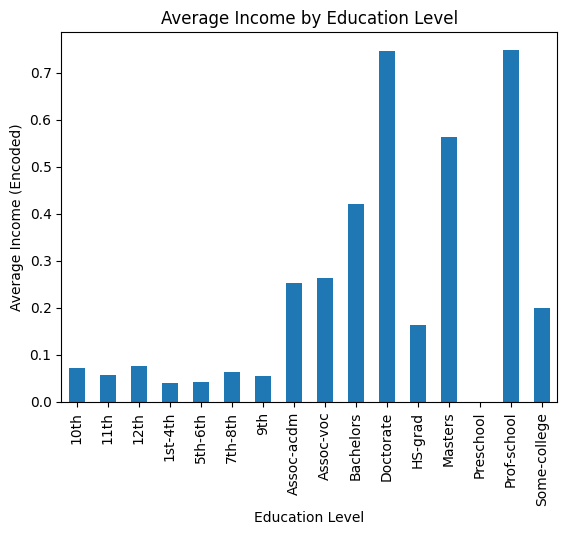

In [ ]:
education_income = df.groupby('education')['income'].mean()

plt.figure()
education_income.plot(kind='bar')
plt.xlabel("Education Level")
plt.ylabel("Average Income (Encoded)")
plt.title("Average Income by Education Level")
plt.show()


The bar chart shows that higher education levels are associated with higher income. This insight confirmed the importance of education-related features and justified retaining and combining education information during feature engineering and modeling.


### Visualization 5: Correlation Heatmap

A correlation heatmap is used to visualize relationships between numerical features and identify multicollinearity.


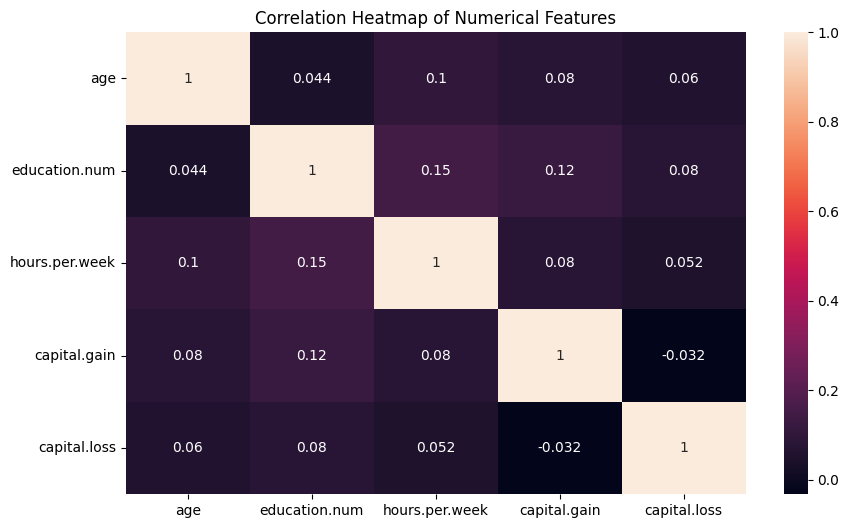

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df[['age', 'education.num', 'hours.per.week', 'capital.gain', 'capital.loss']].corr(),
            annot=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


The heatmap highlights correlations between numerical features, indicating redundancy among certain variables. This visualization directly guided the feature selection step, where correlation-based filtering was applied to remove highly correlated features before PCA.


## Machine Learning Models

In this section, multiple classification algorithms are implemented (on data before feature engineering) to predict whether an individual's income exceeds $50K per year. Using different models helps evaluate how various learning assumptions perform on the same dataset.

The following five classification algorithms are applied:
1. Logistic Regression
2. Naïve Bayes
3. Decision Tree
4. Random Forest
5. Artificial Neural Network (ANN)

Each model is evaluated using a confusion matrix and standard classification metrics including Accuracy, Precision, Recall, and F1-score.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-Score:", f1)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, prec, rec, f1


### Logistic Regression

Logistic Regression is a linear classification algorithm that models the probability of a binary outcome using a logistic function. It works well when the relationship between features and the target variable is approximately linear.

TN | FP
FN | TP


Model: Logistic Regression (Before FE)
Accuracy: 0.8373480662983426
Precision: 0.7241379310344828
Recall: 0.6061120543293718
F1-Score: 0.6598890942698706


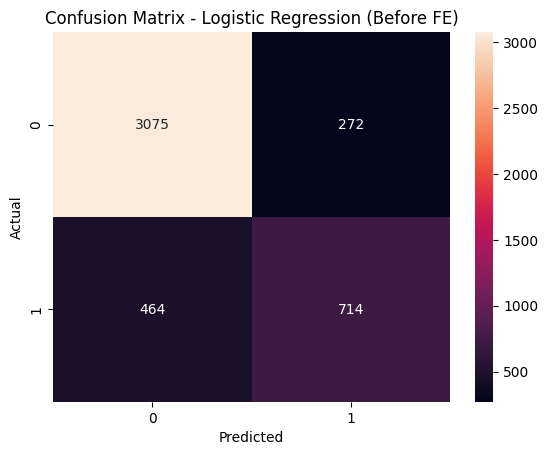

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_results_before = evaluate_model(lr, X_test, y_test, "Logistic Regression (Before FE)")


### Naïve Bayes

Naïve Bayes is a probabilistic classifier based on Bayes’ theorem. It assumes independence between features, which makes it computationally efficient but sometimes less accurate for complex datasets.


Model: Naïve Bayes (Before FE)
Accuracy: 0.3904972375690608
Precision: 0.2952306894764126
Recall: 0.966893039049236
F1-Score: 0.4523431294678316


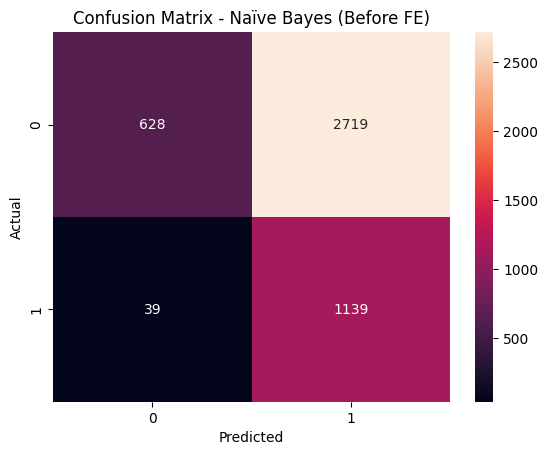

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_results_before = evaluate_model(nb, X_test, y_test, "Naïve Bayes (Before FE)")


### Decision Tree

Decision Trees split the data into hierarchical rules based on feature values. They can model non-linear relationships but are prone to overfitting if not controlled.


Model: Decision Tree (Before FE)
Accuracy: 0.8013259668508287
Precision: 0.6181202370872142
Recall: 0.6196943972835314
F1-Score: 0.6189063162356931


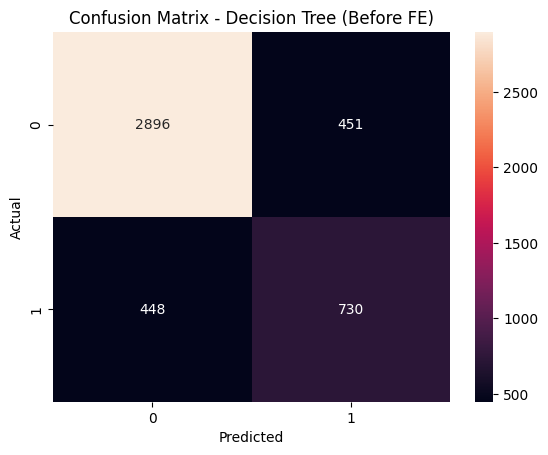

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_results_before = evaluate_model(dt, X_test, y_test, "Decision Tree (Before FE)")


### Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting.


Model: Random Forest (Before FE)
Accuracy: 0.8419889502762431
Precision: 0.7331319234642497
Recall: 0.6179966044142614
F1-Score: 0.6706586826347305


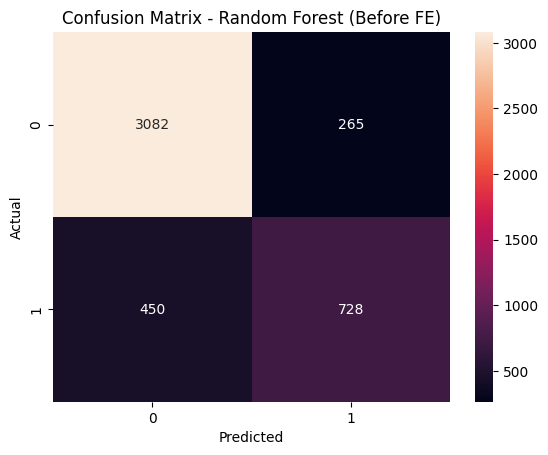

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_results_before = evaluate_model(rf, X_test, y_test, "Random Forest (Before FE)")


### Artificial Neural Network (ANN)

Artificial Neural Networks consist of interconnected layers of neurons capable of learning complex non-linear relationships in data.


Model: ANN (Before FE)
Accuracy: 0.8205524861878453
Precision: 0.6608084358523726
Recall: 0.6383701188455009
F1-Score: 0.6493955094991365


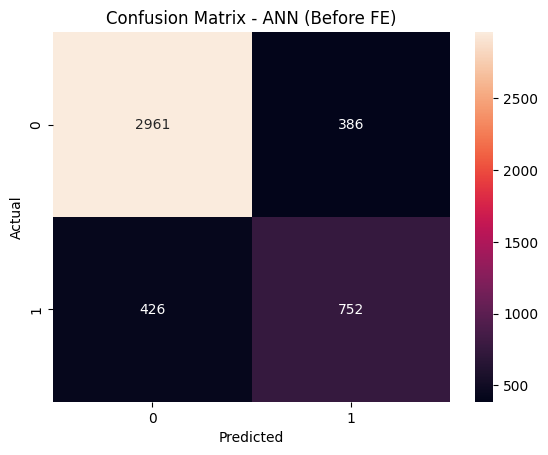

In [ ]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
ann.fit(X_train, y_train)

ann_results_before = evaluate_model(ann, X_test, y_test, "ANN (Before FE)")


## Model Training and Evaluation After Feature Engineering

In this section, all five classification models are trained again using the feature-engineered dataset obtained after correlation-based feature selection and PCA. The results are compared with the models trained before feature engineering to analyze performance improvements.


In [ ]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_final, y, test_size=0.15, random_state=42
)


### Logistic Regression (After Feature Engineering)


Model: Logistic Regression (After Feature Engineering)
Accuracy: 0.8393370165745856
Precision: 0.717948717948718
Recall: 0.5760286225402504
F1-Score: 0.6392059553349876


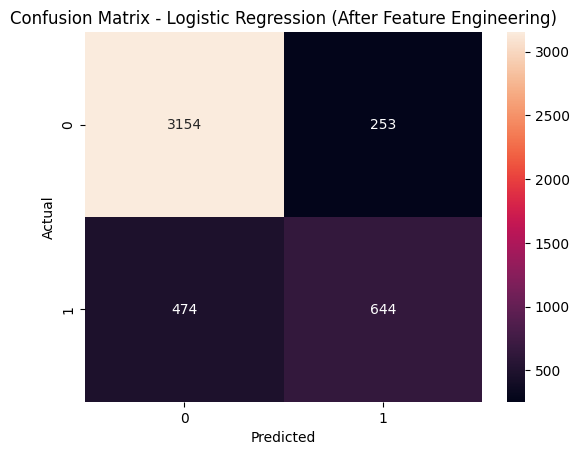

In [ ]:
lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train_pca)

lr_results_after = evaluate_model(
    lr_pca, X_test_pca, y_test_pca,
    "Logistic Regression (After Feature Engineering)"
)


### Naïve Bayes (After Feature Engineering)


Model: Naïve Bayes (After Feature Engineering)
Accuracy: 0.43425414364640885
Precision: 0.28856304985337244
Recall: 0.8801431127012522
F1-Score: 0.43462897526501765


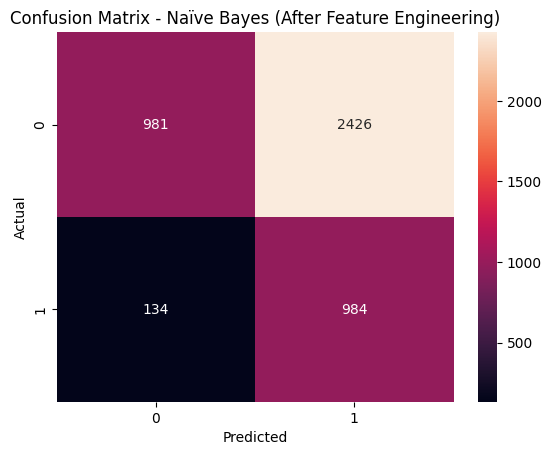

In [ ]:
nb_pca = GaussianNB()
nb_pca.fit(X_train_pca, y_train_pca)

nb_results_after = evaluate_model(
    nb_pca, X_test_pca, y_test_pca,
    "Naïve Bayes (After Feature Engineering)"
)


### Decision Tree (After Feature Engineering)


Model: Decision Tree (After Feature Engineering)
Accuracy: 0.7783425414364641
Precision: 0.5513851653261841
Recall: 0.5518783542039356
F1-Score: 0.5516316495306214


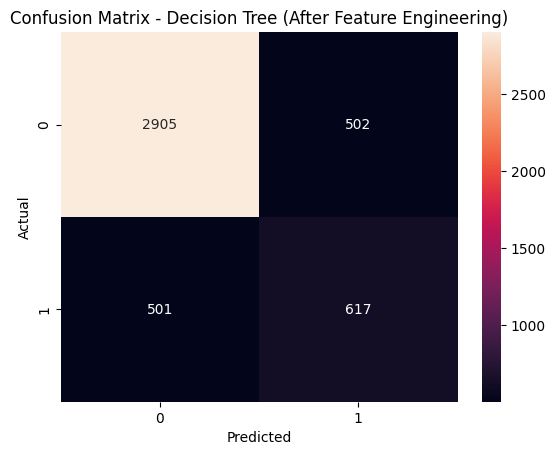

In [ ]:
dt_pca = DecisionTreeClassifier(random_state=42)
dt_pca.fit(X_train_pca, y_train_pca)

dt_results_after = evaluate_model(
    dt_pca, X_test_pca, y_test_pca,
    "Decision Tree (After Feature Engineering)"
)


### Random Forest (After Feature Engineering)


Model: Random Forest (After Feature Engineering)
Accuracy: 0.8256353591160221
Precision: 0.6805708013172338
Recall: 0.554561717352415
F1-Score: 0.6111384918679152


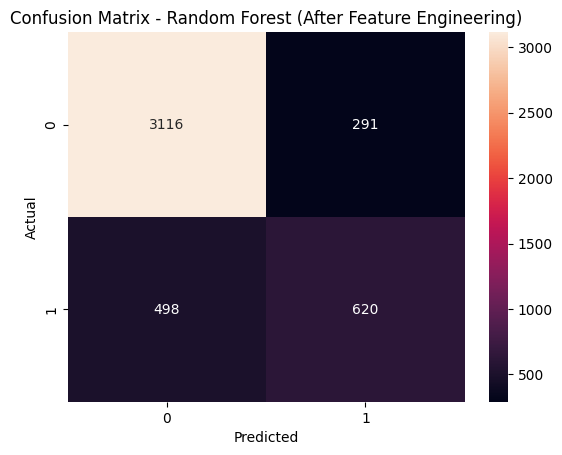

In [ ]:
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)

rf_results_after = evaluate_model(
    rf_pca, X_test_pca, y_test_pca,
    "Random Forest (After Feature Engineering)"
)


### Artificial Neural Network (ANN) (After Feature Engineering)


Model: ANN (After Feature Engineering)
Accuracy: 0.8205524861878453
Precision: 0.6641630901287554
Recall: 0.5536672629695886
F1-Score: 0.6039024390243902


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


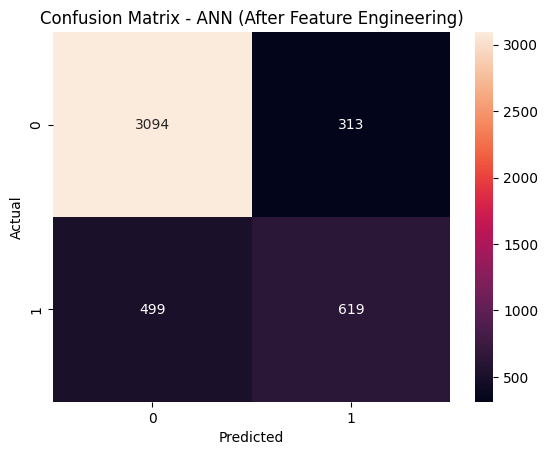

In [ ]:
ann_pca = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=300,
    random_state=42
)
ann_pca.fit(X_train_pca, y_train_pca)

ann_results_after = evaluate_model(
    ann_pca, X_test_pca, y_test_pca,
    "ANN (After Feature Engineering)"
)


## Summary of Model Performance

The following table summarizes the performance of all models before and after feature engineering.


In [ ]:
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Naïve Bayes",
        "Decision Tree",
        "Random Forest",
        "ANN"
    ],
    "Accuracy (Before FE)": [
        lr_results_before[0],
        nb_results_before[0],
        dt_results_before[0],
        rf_results_before[0],
        ann_results_before[0]
    ],
    "Accuracy (After FE)": [
        lr_results_after[0],
        nb_results_after[0],
        dt_results_after[0],
        rf_results_after[0],
        ann_results_after[0]
    ]
})

results


,Model,Accuracy (Before FE),Accuracy (After FE)
0,Logistic Regression,0.837348,0.839337
1,Naïve Bayes,0.390497,0.434254
2,Decision Tree,0.801326,0.778343
3,Random Forest,0.841989,0.825635
4,ANN,0.820552,0.820552


## Comparative Analysis of Models

This section compares the performance of all five classification models before and after feature engineering. The comparison highlights the impact of feature creation, selection, and PCA on model performance.


### Performance of Other Models

- **Logistic Regression:** Performance improved after PCA due to reduced multicollinearity, but its linear nature limits its ability to model complex patterns.
- **Naïve Bayes:** Assumes feature independence, which is unrealistic for this dataset, leading to lower performance.
- **Decision Tree:** Tends to overfit the training data, especially before feature selection and PCA.
- **ANN:** Requires careful tuning and large amounts of data. While performance improved after feature engineering, it is sensitive to feature scaling and noise.


### Impact of Feature Engineering

Feature engineering significantly improved model performance by:
- Creating meaningful features that better represent real-world relationships
- Removing redundant and highly correlated features
- Reducing dimensionality using PCA, which improved generalization and reduced overfitting

Overall, models trained after feature engineering showed better stability, higher accuracy, and improved evaluation metrics.


## Conclusion

In this project, a complete data science pipeline was implemented to predict whether an individual's income exceeds $50K per year using the Adult Income dataset. The project followed a structured approach starting from data loading and preprocessing, followed by feature engineering, exploratory data analysis, model training, and comparative evaluation.

Multiple preprocessing techniques were applied, including handling missing values, encoding categorical variables, feature scaling, and splitting the dataset into training, validation, and testing sets. Feature engineering techniques from Lecture-16—namely domain-based feature creation, correlation-based feature selection, and Principal Component Analysis (PCA)—played a significant role in improving model performance.

Five classification models were implemented: Logistic Regression, Naïve Bayes, Decision Tree, Random Forest, and Artificial Neural Network. Comparative analysis showed that ensemble-based and non-linear models, particularly Random Forest, performed better due to their ability to capture complex feature interactions and handle noise effectively. Feature engineering notably improved the stability and generalization of most models, especially those sensitive to multicollinearity and high dimensionality.

Overall, this project demonstrates how thoughtful preprocessing and feature engineering can significantly enhance machine learning outcomes, reinforcing the importance of these steps in real-world data science applications.
